In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read csv file
data = pd.read_csv("flights.csv")

In [3]:
# Look at the first 5 rows from the dataset
data.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Flights Data Exploration Challenge
    The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

    Year: The year of the flight (all records are from 2013)
    Month: The month of the flight
    DayofMonth: The day of the month on which the flight departed
    DayOfWeek: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
    Carrier: The two-letter abbreviation for the airline.
    OriginAirportID: A unique numeric identifier for the departure aiport
    OriginAirportName: The full name of the departure airport
    OriginCity: The departure airport city
    OriginState: The departure airport state
    DestAirportID: A unique numeric identifier for the destination aiport
    DestAirportName: The full name of the destination airport
    DestCity: The destination airport city
    DestState: The destination airport state
    CRSDepTime: The scheduled departure time
    DepDelay: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
    DelDelay15: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
    CRSArrTime: The scheduled arrival time
    ArrDelay: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
    ArrDelay15: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
    Cancelled: A binary indicator that the flight was cancelled
    
    Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

        Start by cleaning the data.
            Identify any null or missing data, and impute appropriate replacement values.
            Identify and eliminate any outliers in the DepDelay and ArrDelay columns.
        Explore the cleaned data.
            View summary statistics for the numeric fields in the dataset.
            Determine the distribution of the DepDelay and ArrDelay columns.
            Use statistics, aggregate functions, and visualizations to answer the following questions:
            What are the average (mean) departure and arrival delays?
            How do the carriers compare in terms of arrival delay performance?
            Is there a noticable difference in arrival delays for different days of the week?
            Which departure airport has the highest average departure delay?
            Do late* departures tend to result in longer arrival delays than on-time departures?*
            Which route (from origin airport to destination airport) has the most late* arrivals?*
Which route has the highest average arrival delay?

#### Data Manipulation

In [4]:
# View all dataset's summary of statistics (Tranpose view)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,271940.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
Month,271940.0,6.978514,1.982431,4.0,5.0,7.0,9.0,10.0
DayofMonth,271940.0,15.814775,8.799033,1.0,8.0,16.0,23.0,31.0
DayOfWeek,271940.0,3.899316,1.987219,1.0,2.0,4.0,6.0,7.0
OriginAirportID,271940.0,12744.899584,1501.199773,10140.0,11292.0,12892.0,14057.0,15376.0
DestAirportID,271940.0,12739.136493,1502.569949,10140.0,11292.0,12892.0,14057.0,15376.0
CRSDepTime,271940.0,1325.498713,470.748546,1.0,920.0,1320.0,1725.0,2359.0
DepDelay,271940.0,10.350449,35.673710,-63.0,-4.0,-1.0,9.0,1425.0
DepDel15,269179.0,0.201134,0.400849,0.0,0.0,0.0,0.0,1.0
CRSArrTime,271940.0,1505.477819,493.204020,1.0,1119.0,1529.0,1918.0,2359.0


In [5]:
# Total Null Value numbers for each column
data.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [6]:
# Total "0" and "1" values from DepDel15 column. (This column describe the flights which makes delay for 15min or more.)
data["DepDel15"].value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

In [7]:
# (Numeric delay time column.) Return true if total time for delay 15mins or more, else False
(data["DepDelay"] >= 15).value_counts()

False    217799
True      54141
Name: DepDelay, dtype: int64

In [8]:
# How many rows are non-null from DepDelay
data["DepDelay"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 271940 entries, 0 to 271939
Series name: DepDelay
Non-Null Count   Dtype
--------------   -----
271940 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [9]:
# Fill the rows at DepDel15 according to DepDelay column.
data["DepDel15"] = data["DepDel15"].fillna(0)

In [10]:
# Is there still a null value here?
data.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [11]:
# Look at the statistical summary again on Transpose version.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,271940.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
Month,271940.0,6.978514,1.982431,4.0,5.0,7.0,9.0,10.0
DayofMonth,271940.0,15.814775,8.799033,1.0,8.0,16.0,23.0,31.0
DayOfWeek,271940.0,3.899316,1.987219,1.0,2.0,4.0,6.0,7.0
OriginAirportID,271940.0,12744.899584,1501.199773,10140.0,11292.0,12892.0,14057.0,15376.0
DestAirportID,271940.0,12739.136493,1502.569949,10140.0,11292.0,12892.0,14057.0,15376.0
CRSDepTime,271940.0,1325.498713,470.748546,1.0,920.0,1320.0,1725.0,2359.0
DepDelay,271940.0,10.350449,35.673710,-63.0,-4.0,-1.0,9.0,1425.0
DepDel15,271940.0,0.199092,0.399318,0.0,0.0,0.0,0.0,1.0
CRSArrTime,271940.0,1505.477819,493.204020,1.0,1119.0,1529.0,1918.0,2359.0


#### Data Visualization
##### Clean Outliers

ArrDelay 
Minimum: -75.00
Mean: 1440.00
Median: 6.50
Mode: -3.00
Maximum: 0.00

DepDelay 
Minimum: -63.00
Mean: 1425.00
Median: 10.35
Mode: -1.00
Maximum: -3.00



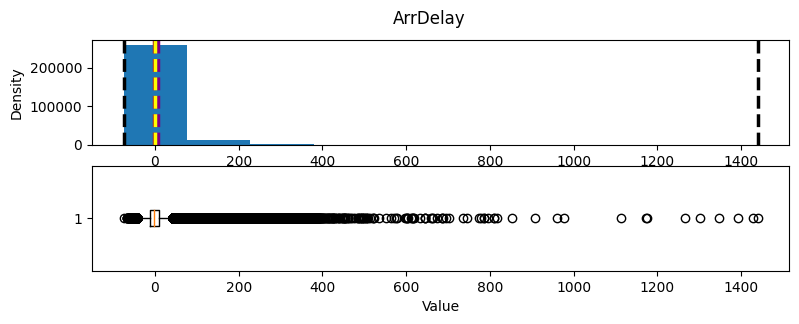

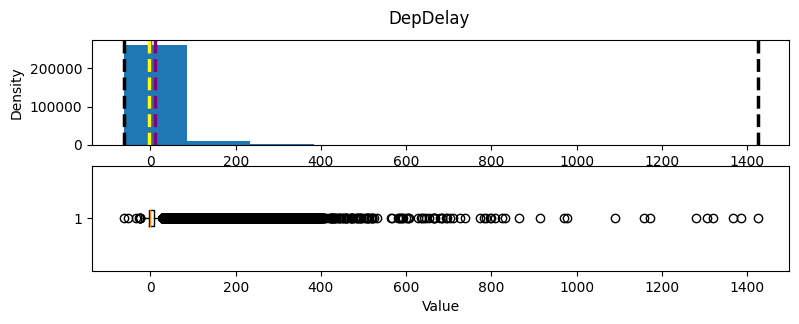

In [12]:
# Define a function for visualiztion and show statistical values on from ArrDelay and DepDelay Columns.
def distributions(df):
    minimum = df.min()
    maximum = df.max()
    mean = df.mean()
    median = df.median()
    mode = df.mode()[0]
    
    print(df.name, "\nMinimum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMaximum: {:.2f}\n".format(minimum, maximum, mean, median, mode))
    
    fig, stat = plt.subplots(2, 1, figsize=(9,3))
    
    fig.suptitle(df.name)
    
    stat[0].hist(df)
    stat[0].set_ylabel('Density')
    
    stat[0].axvline(x=minimum, linestyle='dashed', color = 'black', linewidth = 2.5)
    stat[0].axvline(x=mean, linestyle='dashed', color = 'purple', linewidth = 2.5)
    stat[0].axvline(x=median, linestyle='dashed', color = 'brown', linewidth = 2.5)
    stat[0].axvline(x=mode, linestyle='dashed', color = 'yellow', linewidth = 2.5)
    stat[0].axvline(x=maximum, linestyle='dashed', color = 'black', linewidth = 2.5)
    
    stat[1].boxplot(df, vert=False)
    stat[1].set_xlabel('Value')
    
    fig.show()
    
delays = ["ArrDelay", "DepDelay"]
for delay in delays:
    distributions(data[delay])

In [13]:
# Trim the outliers according to between %1 and %90 at ArrDelay
ArrQuantile01 = data.ArrDelay.quantile(0.01)
ArrQuantile90 = data.ArrDelay.quantile(0.90)
data = data[data.ArrDelay < ArrQuantile90]
data = data[data.ArrDelay > ArrQuantile01]

In [14]:
# Trim the outliers according to between %1 and %90 at DepDelay
DepQuantile90 = data.DepDelay.quantile(0.90) 
DepQuantile01 = data.DepDelay.quantile(0.01)
data = data[data.DepDelay < DepQuantile90]
data = data[data.DepDelay > DepQuantile01]

ArrDelay 
Minimum: -32.00
Mean: 37.00
Median: -5.03
Mode: -6.00
Maximum: 0.00

DepDelay 
Minimum: -11.00
Mean: 16.00
Median: -0.92
Mode: -2.00
Maximum: -3.00



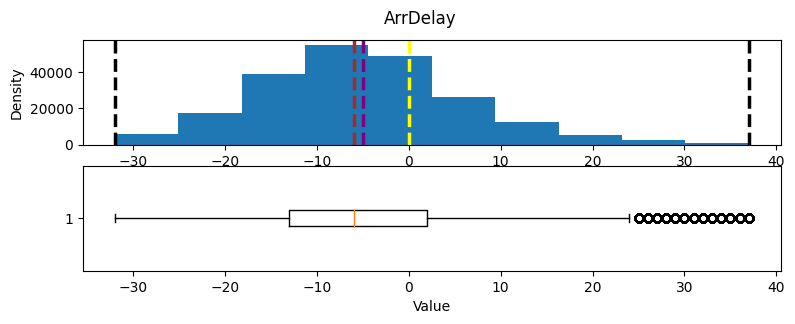

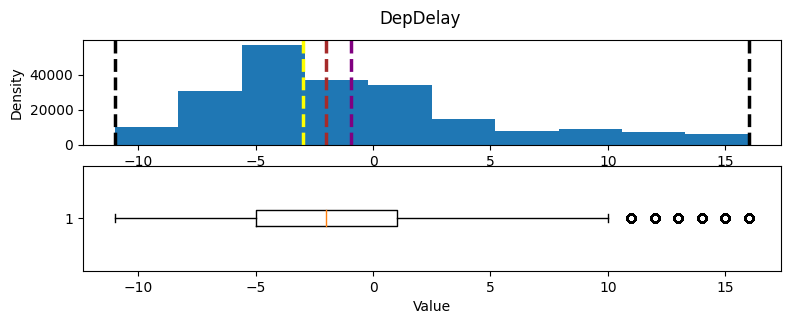

In [15]:
# Let's look at those graphics again through our function.
for delay in delays:
    distributions(data[delay])

In [21]:
# Now let's we check describes again.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,214397.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
Month,214397.0,7.018368,2.006398,4.0,5.0,7.0,9.0,10.0
DayofMonth,214397.0,15.794703,8.859118,1.0,8.0,16.0,23.0,31.0
DayOfWeek,214397.0,3.902737,1.997744,1.0,2.0,4.0,6.0,7.0
OriginAirportID,214397.0,12757.827661,1510.058629,10140.0,11292.0,12892.0,14100.0,15376.0
DestAirportID,214397.0,12726.276147,1506.251757,10140.0,11292.0,12892.0,14057.0,15376.0
CRSDepTime,214397.0,1278.223879,469.440262,1.0,850.0,1235.0,1655.0,2359.0
DepDelay,214397.0,-0.921692,5.708594,-11.0,-5.0,-2.0,1.0,16.0
DepDel15,214397.0,0.018116,0.133371,0.0,0.0,0.0,0.0,1.0
CRSArrTime,214397.0,1461.406596,485.676457,1.0,1054.0,1445.0,1845.0,2359.0


In [17]:
data[delays].mean()

ArrDelay   -5.030276
DepDelay   -0.921692
dtype: float64

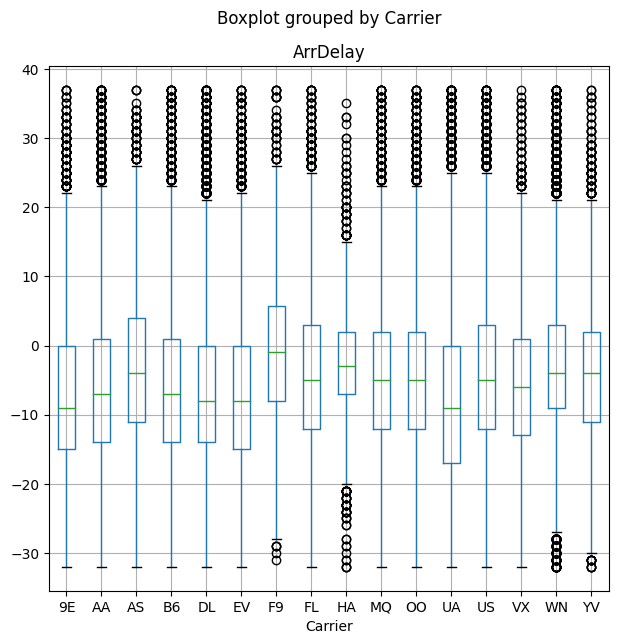

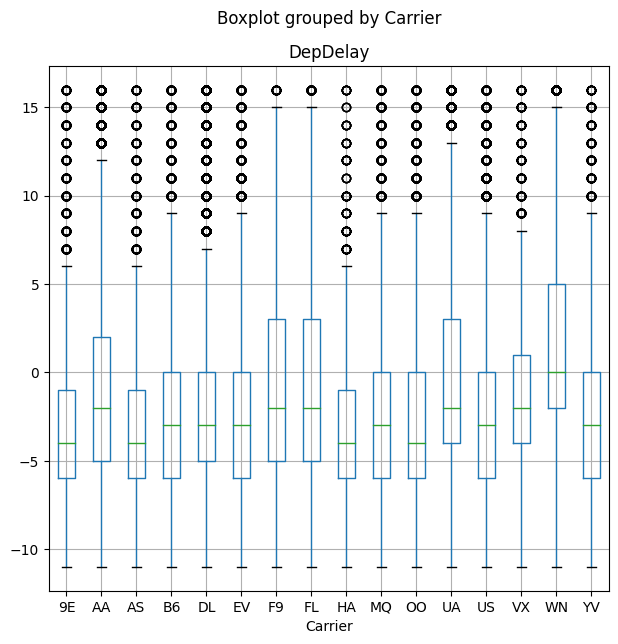

In [19]:
# Create boxplot grouped by Carrier values.
for delay in delays:
    data.boxplot(column=delay, by='Carrier', figsize=(7,7))

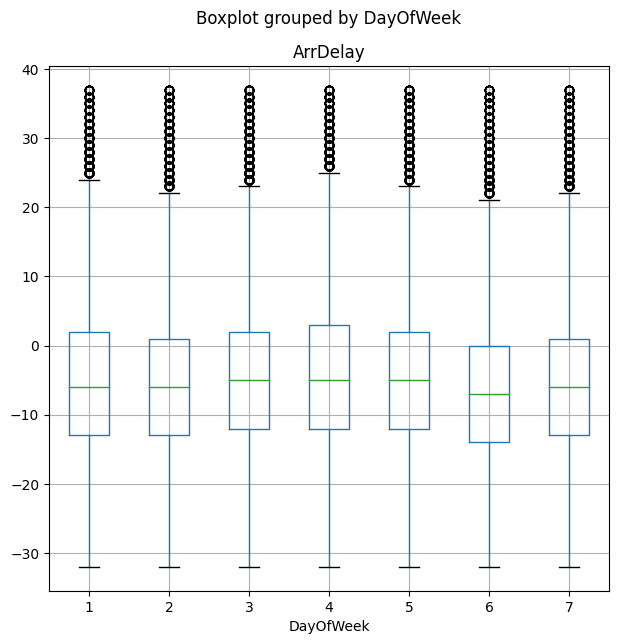

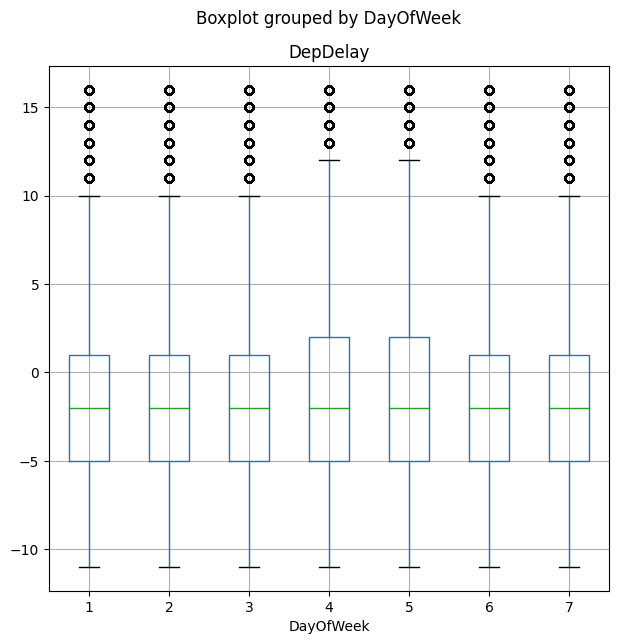

In [20]:
# Create boxplot grouped by DayOfWeek values.
for delay in delays:
    data.boxplot(column=delay, by='DayOfWeek', figsize=(7,7))

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


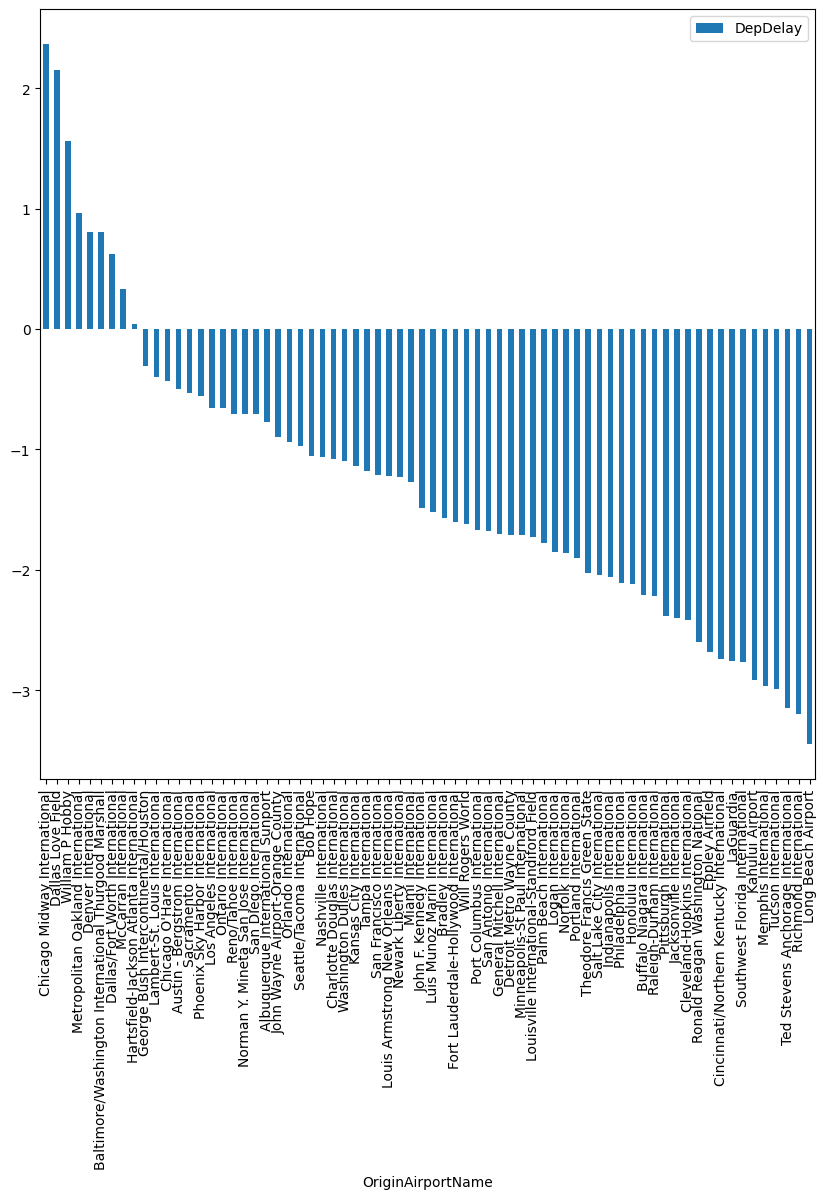

In [24]:
# Now let's we check DepDelay values on grouped by OriginAirportName
departure = data.groupby(data.OriginAirportName)

mean_departures = pd.DataFrame(departure['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departures.plot(kind = "bar", figsize=(10,10))
mean_departures

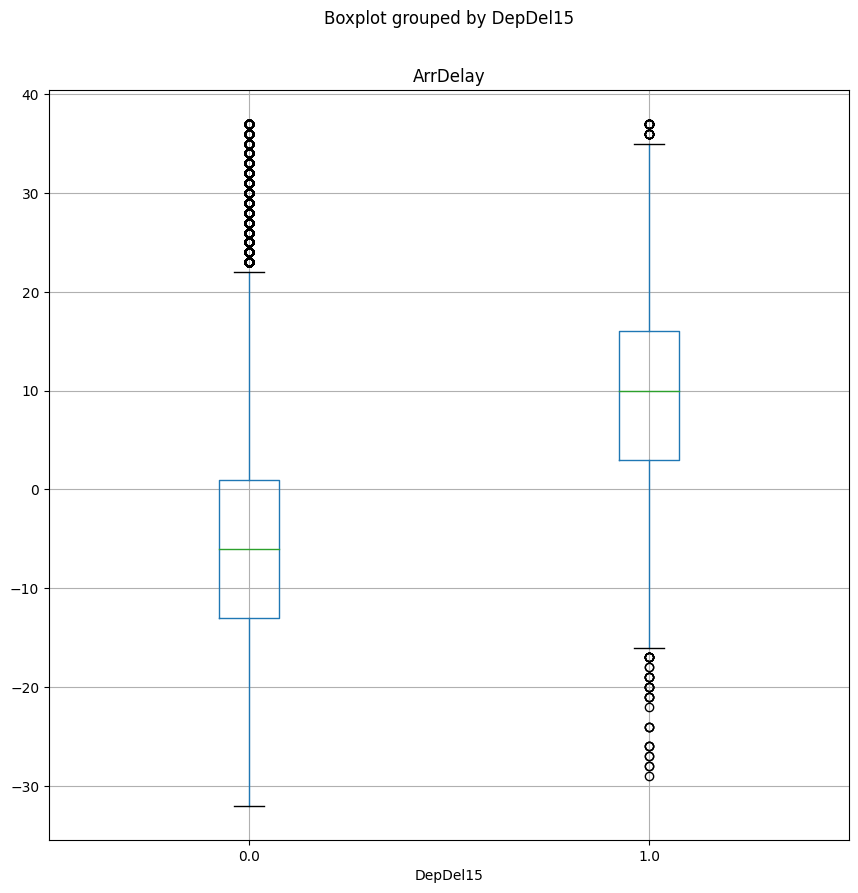

In [26]:
# Look at the correlation on ArrDelay and DepDel15
data.boxplot(column='ArrDelay', by='DepDel15', figsize=(10,10));

In [27]:
# Add a new columns which name is "routes"
routes = pd.Series(data['OriginAirportName'] + ' > ' + data['DestAirportName'])
data = pd.concat([data, routes.rename("Routes")], axis=1)

# Group by routes
routes = data.groupby(data.Routes)
pd.DataFrame(routes['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Routes,
San Francisco International > Los Angeles International,90
Los Angeles International > San Francisco International,69
LaGuardia > Hartsfield-Jackson Atlanta International,68
Los Angeles International > John F. Kennedy International,52
LaGuardia > Charlotte Douglas International,51
...,...
Logan International > Austin - Bergstrom International,0
Logan International > Memphis International,0
Logan International > Port Columbus International,0


In [29]:
# And the last correlation results.
pd.DataFrame(routes['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Routes,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667
